In [1]:
%matplotlib notebook
%config Completer.use_jedi = False

In [2]:
from pathlib import Path

import sys

import os

from astropy.nddata import CCDData
from astropy.visualization import hist
import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

from matplotlib.colors import LogNorm
from PIPELINE.convenience_functions import show_image

from astropy.utils.data import get_pkg_data_filename
from astropy.table import Table
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import importlib



from astropy.stats import mad_std

from itertools import groupby

from PIL import Image as P

from PIPELINE import slit_tracing_mods as stm

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

colorblinds = dict({'navy':'#114477','green':'#117744','lt_navy':'#1965B0','lt_navy_gray':'#4477AA','pastel_gr':'#44AA77',
                   'seafoam':'#44AAAA','merlot':'#771111','dark_magenta':'#774411','sky_blu':'#77CCCC',
                   'lt_seafoam':'#7BAFDE','dead_peach':'#DDAA77','blood_orange':'#E8601C','orange':'#F1932D',
                   'gold':'#F7EE55','pinkish':'#DD77AA','red':'#DC050C','lavender':'#D6C1DE','mint':'#CAE0AB',
                   'dark_lav':'#B178A6','med_lav':'#CC99BB','brown':'#777711'})

In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display,Image
import plotly.express as px
from skimage import io


def check_images(snight):
    # Create widgets
    directory = widgets.Dropdown(options=[snight.raw_data_dir,snight.processing_dir])
    images = widgets.Dropdown(options=os.listdir(directory.value))

    # Updates the image options based on directory value
    def update_images(*args):
        images.options = os.listdir(directory.value)

    # Tie the image options to directory value
    directory.observe(update_images, 'value')

    def show_images(fdir,file):

        fname = f'{fdir}/{file}'


        full_im_ccd = CCDData.read(fname,unit='adu')

        #full_im_pixel_map = jpeg_pixel_map(full_im_ccd.data,s1=10,s2=full_im_data.flatten().max())


        fig = px.imshow(full_im_ccd.data,color_continuous_scale='gray')

        display(fig)

    _ = interact(show_images,fdir=directory,file=images)

In [3]:
SAMOS_raw_path = Path(\
    './fake_raw_SAMOS_data/')

SAMOS_raw = ccdp.ImageFileCollection(SAMOS_raw_path)

SAMOS_raw.summary['file','obstype','exptime','rdnoise','gain']

file,obstype,exptime,rdnoise,gain
str25,str6,float64,float64,float64
mt_140319_210352_fri.fits,FLAT,2.0,3.99,2.06
mt_140319_210620_fri.fits,FLAT,2.0,3.99,2.06
mt_140319_210744_fri.fits,FLAT,2.0,3.99,2.06
mt_140319_210907_fri.fits,FLAT,2.0,3.99,2.06
mt_140319_211031_fri.fits,FLAT,2.0,3.99,2.06
mt_140319_211154_fri.fits,FLAT,2.0,3.99,2.06
mt_140319_211318_fri.fits,FLAT,2.0,3.99,2.06
mt_140319_211442_fri.fits,FLAT,2.0,3.99,2.06
mt_140319_211605_fri.fits,FLAT,2.0,3.99,2.06


In [4]:
from PIPELINE import SAMOS_NIGHT as SN

raw_data_dir = "/Users/danakoeppe/PipelineProjects/Make_FITS_for_SAMOS/SAMI_reduction/GOODMAN_raw_data/"
SNight = SN.SAMOSNight(raw_data_dir=raw_data_dir,
                       obsid="fake_samos_test",
                       proc_dir="processed",
                       LOG_FILENAME="fake_samos_data_test",
                       ignore_bias=False,
                       ignore_flats=False)

SNight()

PIPELINE.SAMOS_NIGHT
the pipeline is sorting your buckets
True
{'obsid': 'fake_samos_test', 'data_path': '/Users/danakoeppe/PipelineProjects/Make_FITS_for_SAMOS/SAMI_reduction/GOODMAN_raw_data/', 'gain': 2.06, 'rdnoise': 3.99, 'ccdsum': '1 1', 'empty_bucket': True, 'bias_buckets': None, 'flat_buckets': None, 'comp_buckets': None, 'targ_buckets': None, 'spec_buckets': None, 'slit_buckets': None, 'fits_slit_locs': None, 'sunset_time': None, 'sunrise_time': None, 'evening_twilight': None, 'morning_twilight': None, 'header_keys': ['naxis', 'date', 'slit', 'date-obs', 'obstype', 'object', 'exptime', 'obsra', 'obsdec', 'grating', 'cam_targ', 'grt_targ', 'filter', 'filter2', 'gain', 'rdnoise', 'ccdsum', 'wavmode']}
added flat bucket                          file  naxis        date                 slit  \
0  psg_140319_210352_fri.fits      2  2014-03-19  Ori0B1-field2-0000R   
1  psg_140319_210620_fri.fits      2  2014-03-19  Ori0B1-field2-0000R   
2  psg_140319_210744_fri.fits      2  2014-03

[<class 'PIPELINE.DataBucket.DataBucket'>
 SAMOS Observation ID: fake_samos_test
 Data Directory: 
 Working Directory: SAMOS_Draft
 Gain: 2.06
 Readout Noise: 3.99
 ccdsum: 1 1
 Is Empty: False
 
 Bucket Grouping Information
 
 (small buckets inside bigger bucekts!)
 BIAS Group:
 Files in BUCKET
   psg_140319_214444_zri.fits
   psg_140319_214606_zri.fits
   psg_140319_214727_zri.fits
   psg_140319_214849_zri.fits
   psg_140319_215010_zri.fits
   psg_140319_215132_zri.fits
   psg_140319_215253_zri.fits
   psg_140319_215415_zri.fits
   psg_140319_215536_zri.fits
   psg_140319_215658_zri.fits
   psg_140319_215819_zri.fits
   psg_140319_215940_zri.fits
   psg_140319_220102_zri.fits
   psg_140319_220223_zri.fits
   psg_140319_220345_zri.fits
   psg_140319_220506_zri.fits
   psg_140319_220628_zri.fits
   psg_140319_220749_zri.fits
   psg_140319_220911_zri.fits
   psg_140319_221032_zri.fits
 FLATs Group:
 Files in BUCKET
   psg_140319_210352_fri.fits
   psg_140319_210620_fri.fits
   psg_14031

In [10]:
import PIPELINE.ImageProcessor as ImProc
import PIPELINE.SAMOS_mods as Smods
importlib.reload(Smods)
importlib.reload(ImProc)


SN_ccd = ImProc.ImageProcessor(SNight)
SN_ccd()



INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


/Users/danakoeppe/PipelineProjects/Make_FITS_for_SAMOS/SAMI_reduction/GOODMAN_raw_data/
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
                          file  naxis        date                 slit  \
30  psg_140319_235651_ori.fits      2  2014-03-19  Ori0B1-field2-0000R   
31  psg_140320_001436_ori.fits      2  2014-03-20  Ori0B1-field2-0000R   
32  psg_140320_003057_ori.fits      2  2014-03-20  Ori0B1-field2-0000R   
33  psg_140320_005007_cri.fits      2  2014-03-20  Ori0B1-field2-0000R   
34  psg_140320_005319_cri.fits      2  2014-03-20  Ori0B1-field2-0000R   
35  psg_140320_005443_cri.fits      2  2014-03-20  Ori0B1-field2-0000R   
36  psg_140320_005607_cri.fits      2  2014-03-20  Ori0B1-field2-0000R   
37  psg_140320_005731_cri.fits      2  2014-03-20  Ori0B1-field2-0000R   
38  psg_140320_005854_cri.fits      2  2014-03-20  Ori0B1-field2-0000R   
39  psg_140320_010018_cri.fits      2  2014-03-20  Ori0B1-field2-0000R   
40  psg_140320_010142_cri.fits      2  2014-03-20  Ori0B1-field2-0000R   
41  psg_1403

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_001436_ori.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_003057_ori.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_005007_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No OBJECT images to combine
ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_005319_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No OBJECT images to combine
ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_005443_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No OBJECT images to combine
ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_005607_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No OBJECT images to combine
ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_005731_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No OBJECT images to combine
ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_005854_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No OBJECT images to combine
ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_010018_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No OBJECT images to combine
ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_010142_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No OBJECT images to combine
ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_010305_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No OBJECT images to combine
ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_010429_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No OBJECT images to combine
ERROR:PIPELINE.ImageProcessor:No COMP images to combine
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_010553_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
processed/master_flat_400 m2_GG455_01-2-0000.fits processed/master_flat_400 m2_GG455_01-2-0000.fits
(1896, 4081) (1896, 4081)


ERROR:PIPELINE.ImageProcessor:No OBJECT images to combine
ERROR:PIPELINE.ImageProcessor:No COMP images to combine


Empty DataFrame
Columns: [x_edge_left, x_edge_right, y_mid]
Index: [] Index([], dtype='object')


In [5]:
test_img = raw_data_dir+"psg_140319_235651_ori.fits"  
test_ccd = CCDData.read(test_img)
figt = plt.figure(figsize=(9,9)) # we want the largest figure that will fit in the notebook
imgt = plt.imshow(test_ccd, cmap='gray') 

In [7]:
mf = SN_ccd.master_flat


mf.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4332                                                  
NAXIS2  =                 4112                                                  
DATE-OBS= '2014-03-19T21:03:52.430' / UTC epoch                                 
DATE    = '2014-03-19'         / Date Format is YYYY-MM-DD                      
TIME    = '21:03:52.43 to 21:03:54.76' / ~ Start & Stop of Exposure             
N_PARAM =                   80 / Number of Parameters                           
PARAM0  =               -106.5 / CCD Temperature, C                             
PARAM1  =                    0 / Not Used                                       
PARAM2  =                0.000 / CCD Chamber Pressure,Torr                      
PARAM3  =                   

In [8]:
importlib.reload(stm)

mfd = mf.data
mf_slit1 = mf.header['slit_02'].split('/')[0].strip(' ')
specsec_xcols = int(mf.header['specsec'].split(",")[0].split(":")[0].strip("'["))
specsec_yrows = int(mf.header['specsec'].split(",")[1].split(":")[0])

cutout_size = 10
binsize = 30



x_left_start = int(mf_slit1.split(',')[0].split(':')[0].strip("'").strip("['").strip("]'"))-specsec_xcols
x_right_start = int(mf_slit1.split(',')[0].split(':')[1].strip("'").strip("['").strip("]'"))-specsec_xcols
y_mid_start = int(mf_slit1.split(',')[1].strip("'").strip("['").strip("]'"))-specsec_yrows



slitDF = stm.read_initial_slit_edges_from_header(mf)
slitDF

,x_edge_left,x_edge_right,y_mid
0,265,336,1442
1,438,510,1442
2,556,627,1442
3,772,840,1442


In [9]:
importlib.reload(stm)

x_edges_all_left,y_edges_all_left = [],[]
x_edges_all_right,y_edges_all_right = [],[]


for slit in slitDF.index:

    previous_x_left_coord = slitDF.loc[slit,'x_edge_left']
    previous_x_right_coord = slitDF.loc[slit,'x_edge_right']
    y_mid_start = slitDF.loc[slit,'y_mid']
    
    x_edges_left,y_edges_left = stm.outline_slit_edges(mfd,x_init=previous_x_left_coord,
                                               y_init=y_mid_start)

    x_edges_right,y_edges_right = stm.outline_slit_edges(mfd,x_init=previous_x_right_coord,
                                               y_init=y_mid_start)
    
    
    x_edges_all_left.append(x_edges_left)
    x_edges_all_right.append(x_edges_right)
    y_edges_all_left.append(y_edges_left)
    y_edges_all_right.append(y_edges_right)
    
    

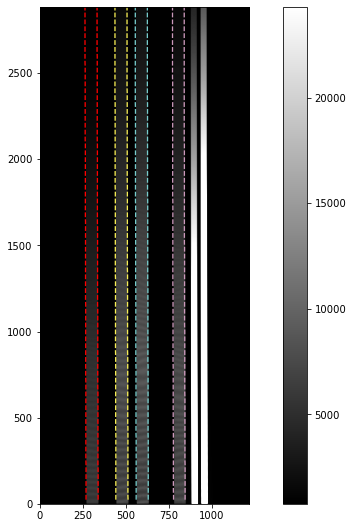

In [127]:
from astropy.nddata.utils import block_reduce, Cutout2D
from astropy import visualization as aviz


image = mfd
fig, ax = plt.subplots(1, 1, figsize=(15,15))

percu = 85
percl = 100-percu
cmap = 'gray'

# Thanks, https://stackoverflow.com/questions/29702424/how-to-get-matplotlib-figure-size
fig_size_pix = fig.get_size_inches() * fig.dpi

ratio = (image.shape // fig_size_pix).max()

if ratio < 1:
    ratio = 1


reduced_data = block_reduce(image, ratio)
extent = [0, image.shape[1], 0, image.shape[0]]

#if log:
#stretch = aviz.LogStretch()
#else:
stretch = aviz.LinearStretch()

norm = aviz.ImageNormalize(reduced_data,
                           interval=aviz.AsymmetricPercentileInterval(percl, percu),
                           stretch=stretch)

scale_args = dict(norm=norm)
im = ax.imshow(mfd, origin='lower',
               cmap=cmap, extent=extent, aspect='equal',**scale_args)

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)



ax.plot(x_edges_all_left[0],y_edges_all_left[0],color='red',ls='--',lw=1.3)
ax.plot(x_edges_all_right[0],y_edges_all_right[0],color='red',ls='--',lw=1.3)

ax.plot(x_edges_all_left[1],y_edges_all_left[1],color=colorblinds['gold'],ls='--',lw=1.3)
ax.plot(x_edges_all_right[1],y_edges_all_right[1],color=colorblinds['gold'],ls='--',lw=1.3)

ax.plot(x_edges_all_left[2],y_edges_all_left[2],color=colorblinds['sky_blu'],ls='--',lw=1.3)
ax.plot(x_edges_all_right[2],y_edges_all_right[2],color=colorblinds['sky_blu'],ls='--',lw=1.3)

ax.plot(x_edges_all_left[3],y_edges_all_left[3],color=colorblinds['med_lav'],ls='--',lw=1.3)
ax.plot(x_edges_all_right[3],y_edges_all_right[3],color=colorblinds['med_lav'],ls='--',lw=1.3)


#fig.savefig("./master_flat_with_slit_traces.pdf",bbox_inches='tight')


In [11]:

from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.wcs import WCS


ra,dec = '06:08:12.786','24:20:32.496'
ra1,dec1 = '92.04109975', '24.35650819'
c = SkyCoord(ra=ra1,dec=dec1,unit=(u.degree,u.degree))
c.ra.hms,c.dec.dms

(hms_tuple(h=6.0, m=8.0, s=9.863940000003595),
 dms_tuple(d=24.0, m=21.0, s=23.42948399999841))

In [12]:
c.ra.degree,c.dec.degree

(92.04109975, 24.35650819)

In [13]:
ratan = '92.041079167'
dectan = '24.334026944'
ctan = SkyCoord(ra=ratan,dec=dectan,unit=(u.degree,u.degree))

ctan.ra.hms,ctan.dec.dms

(hms_tuple(h=6.0, m=8.0, s=9.859000080007334),
 dms_tuple(d=24.0, m=20.0, s=2.496998400005168))

In [25]:
PHDU = fits.open("../../Make_FITS_for_SAMOS/SAMI_reduction/SAMI_raw_data/2014-03-06/psa_140307_001423_ori.fits.fz")
hdu1 = PHDU[1]
hdu2 = PHDU[2]
hdu3 = PHDU[3]
hdu4 = PHDU[4]

wcs1 = WCS(hdu1.header)
wcs2 = WCS(hdu2.header)
scoords1 = SkyCoord(ra="06:08:3.7822",dec="24:21:22.927",unit=(u.hourangle,u.deg),frame="fk5")
wrld_to_pix = wcs1.world_to_pixel(ctan)
pix_to_wrld = wcs1.array_index_to_world([-0.5],[2152.5])
print(hdu1.data.shape,wrld_to_pix[1],(wrld_to_pix[0]))
wcs1,wcs2,wrld_to_pix,pix_to_wrld

(2056, 2163) -0.9491440115314214 2153.0404625185683


(WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN'  'DEC--TAN'  
 CRVAL : 92.041079167  24.334026944  
 CRPIX : 2153.5  0.5  
 CD1_1 CD1_2  : 1.25e-05  0.0  
 CD2_1 CD2_2  : -0.0  1.25e-05  
 NAXIS : 2163  2056,
 WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN'  'DEC--TAN'  
 CRVAL : 92.041079167  24.334026944  
 CRPIX : 1128.5  0.5  
 CD1_1 CD1_2  : 1.25e-05  0.0  
 CD2_1 CD2_2  : -0.0  1.25e-05  
 NAXIS : 2163  2056,
 (array(2153.04046252), array(-0.94914401)),
 <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
     [(92.04107917, 24.33402694)]>)

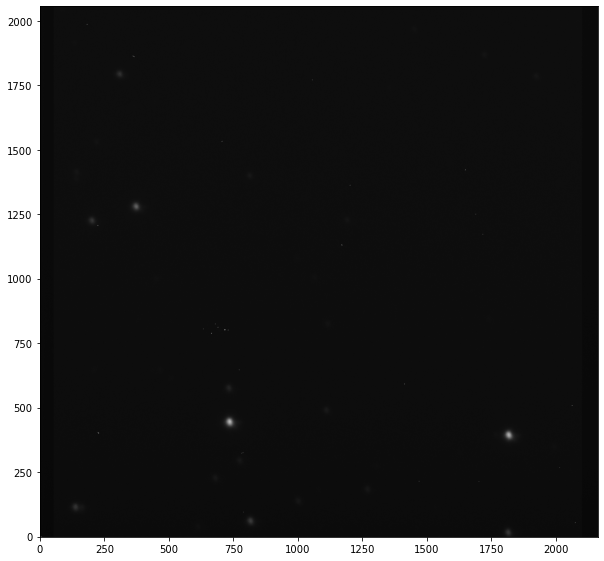

In [24]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(hdu1.data, origin='lower', cmap='gray',norm=LogNorm(vmin=(750),vmax=(2200)))

In [67]:

### Pixel-World header ###

pixscale = 0.14814815 
pixscale_deg = pixscale/3600.
decpangle = 0.
cd11 = pixscale_deg*np.cos(decpangle)
cd22 = cd11
cd12 = pixscale_deg*np.sin(decpangle)
cd21 = -pixscale_deg*np.sin(decpangle)

fake_SAMOS_header_img = { 'NAXIS' : 2,
                          'NAXIS1' : 1215,
                          'NAXIS2' : 1215,
                          'PIXSCALE' : pixscale,
                          'CD1_1' : cd11,
                          'CD1_2' : cd12,
                          'CD2_1' : cd21,
                          'CD2_2' : cd22,
                          'CTYPE1' : 'RA---TAN',
                          'CTYPE2' : 'DEC--TAN',
                          'CRVAL1' : 92.0215197, #reference RA (deg)
                          'CRVAL2' : 24.3394499, #reference dec (deg)
                          'CRPIX1' : 654, #reference X val (pixel)
                          'CRPIX2' : 433  #reference Y val (pixel)
                        }



### DMD-World header ###


mirror_scale = 1./6. #arcsec per mirror
mscale_deg = mirror_scale/3600.
#pretend decpangle (=PAngle) is the same
m_cd11 = mscale_deg*np.cos(decpangle)
m_cd22 = m_cd11
m_cd12 = mscale_deg*np.sin(decpangle)
m_cd21 = -mscale_deg*np.sin(decpangle)



wrld_to_DMD_header = {'NAXIS' : 2,
                      'NAXIS1' : 1080,
                      'NAXIS2' : 1080,
                      'PIXSCALE' : mirror_scale,
                      'CD1_1' : m_cd11,
                      'CD1_2' : m_cd12,
                      'CD2_1' : m_cd21,
                      'CD2_2' : m_cd22,
                      'CTYPE1' : 'RA---TAN',
                      'CTYPE2' : 'DEC--TAN',
                      'CRVAL1' : 92.0215197, #reference RA (deg)
                      'CRVAL2' : 24.3394499, #reference dec (deg)
                      'CRPIX1' : 300, #reference X val (pixel)
                      'CRPIX2' : 200  #reference Y val (pixel)
                        }





fwcs = WCS(fake_SAMOS_header_img)

mwcs = WCS(wrld_to_DMD_header)

fwcs,mwcs

(WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN'  'DEC--TAN'  
 CRVAL : 92.0215197  24.3394499  
 CRPIX : 654.0  433.0  
 CD1_1 CD1_2  : 4.11522638888888e-05  0.0  
 CD2_1 CD2_2  : -0.0  4.11522638888888e-05  
 NAXIS : 1215  1215,
 WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN'  'DEC--TAN'  
 CRVAL : 92.0215197  24.3394499  
 CRPIX : 300.0  200.0  
 CD1_1 CD1_2  : 4.62962962962962e-05  0.0  
 CD2_1 CD2_2  : -0.0  4.62962962962962e-05  
 NAXIS : 1080  1080)

In [112]:
samos_header_sky_coords = SkyCoord(fake_SAMOS_header_img['CRVAL1'],fake_SAMOS_header_img['CRVAL2'],unit=u.deg)
DMD_header_sky_coords = SkyCoord(wrld_to_DMD_header['CRVAL1'],wrld_to_DMD_header['CRVAL2'],unit=u.deg)


#pick mirrors that are open/closed based on dmd array and convert to pixel
mirror_sky_coords = mwcs.array_index_to_world(fake_SAMOS_header_img['CRPIX2'],fake_SAMOS_header_img['CRPIX1'])
mirror_pix_coords = fwcs.world_to_array_index(mirror_sky_coords)

print(mirror_sky_coords,samos_header_sky_coords,DMD_header_sky_coords)

adj_mirror_sky_coords = mwcs.array_index_to_world(fake_SAMOS_header_img['CRPIX2'],fake_SAMOS_header_img['CRPIX1']+1)
adj_mirror_pix_coords = fwcs.world_to_array_index(adj_mirror_sky_coords)

slit_row_pix,slit_col_pix1,slit_col_pix2 = adj_mirror_pix_coords[0],mirror_pix_coords[1],adj_mirror_pix_coords[1]
print(mirror_pix_coords,adj_mirro_pix_coords)


print(fwcs.world_to_array_index(DMD_header_sky_coords))


fwcs.world_to_array_index(samos_header_sky_coords),\
    mwcs.world_to_array_index(samos_header_sky_coords)


<SkyCoord (ICRS): (ra, dec) in deg
    (92.03955969, 24.35028217)> <SkyCoord (ICRS): (ra, dec) in deg
    (92.0215197, 24.3394499)> <SkyCoord (ICRS): (ra, dec) in deg
    (92.0215197, 24.3394499)>
(695, 1052) (695, 1053)
(432, 653)


((432, 653), (199, 299))

In [126]:
importlib.reload(stm)

print(stm.DMD_to_SAMI(433,654))

dmd_i,dmd_j = stm.sky_coords_to_DMD(mirror_sky_coords)
sami_i,sami_j = stm.DMD_to_SAMI(dmd_j,dmd_i)

print(dmd_i,dmd_j,sami_i,sami_j)
stm.sky_coords_to_SAMI(mirror_sky_coords)

DMD (row,col) = 654,433
RA,DEC = 92.02832971126027,24.36051456179499
SAMI (row,col) = 944,804
(944, 804)
DMD (row,col) = 433,654
RA,DEC = 92.03955968977398,24.35028216639596
SAMI (row,col) = 695,1052
433 654 695 1052


(695, 1052)

In [105]:
dmd_arr = pd.DataFrame(np.ones(shape=(1080,1080),dtype=int))

pix_arr = pd.DataFrame(np.ones(shape=(1215,1215)))

dmd_arr.loc[wrld_to_DMD_header['CRPIX2'],wrld_to_DMD_header['CRPIX1']] = 0
dmd_arr.loc[wrld_to_DMD_header['CRPIX2'],wrld_to_DMD_header['CRPIX1']+1] = 0

pix_arr.loc[slit_row_pix,slit_col_pix1:slit_col_pix2] = 0,0

pix_arr.loc[680:700,1030:1100]


,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100
680,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
681,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
682,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
683,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
684,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
685,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
687,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
688,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
689,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [63]:
pretend_targ_coords = SkyCoord(92.0166691,24.3500183,unit=u.deg)

DMD_coords = mwcs.world_to_array_index(pretend_targ_coords)
slit_row = DMD_coords[0]
slit_cols = (DMD_coords[1]-1,DMD_coords[1]+1)


pix_coords = fwcs.world_to_array_index(pretend_targ_coords)


print(DMD_coords,pix_coords)
print(slit_cols,slit_row)

dmd_arr.loc[DMD_coords[0],DMD_coords[1]]

(427, 204) (689, 546)
(203, 205) 427


1

In [20]:
pix_arr[:] = hdu1.data[:1215,600:600+1215]
print(pix_arr.values.max(),pix_arr.values.min())
pix_arr

4789 773


,0,1,2,3,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,795,791,797,794,791,792,794,797,793,793,...,805,803,808,809,814,819,831,817,823,818
1,795,787,787,799,785,784,780,781,790,790,...,809,800,807,821,813,822,819,828,829,831
2,788,789,789,793,788,788,789,792,793,786,...,808,811,818,812,826,821,823,822,836,838
3,784,791,789,784,786,785,794,790,783,789,...,808,814,814,827,821,832,836,835,842,846
4,795,787,792,797,785,789,793,791,792,787,...,809,820,816,825,827,834,847,840,845,847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,799,799,793,795,790,792,796,792,798,794,...,795,797,798,796,795,794,792,798,794,797
1211,795,794,804,800,786,795,791,790,796,802,...,787,796,797,797,796,800,795,796,795,790
1212,793,791,791,798,793,797,793,797,805,800,...,794,802,797,800,799,791,787,791,789,795
1213,797,790,795,797,799,794,797,795,790,790,...,800,795,793,796,796,792,788,802,791,797


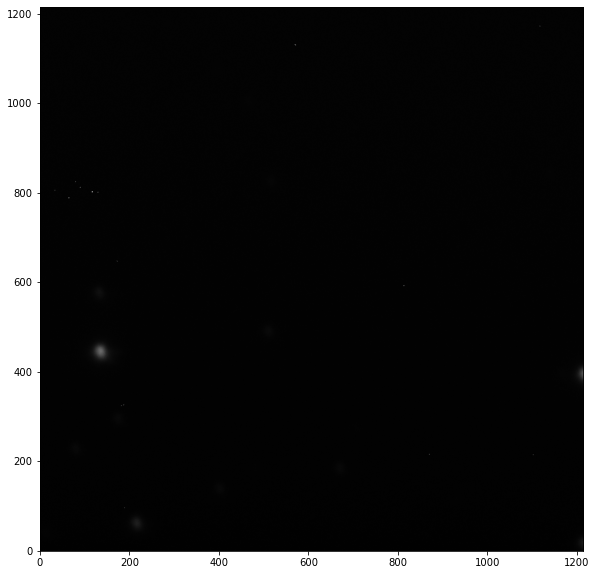

In [23]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(pix_arr, origin='lower', cmap='gray',norm=LogNorm(vmin=(778),vmax=(4789)))